# Predicting Housing Prices in Ames, Iowa

## Project Overview 
***
We will conduct a detailed regression analysis to predict housing prices in Ames, Iowa. 
This project will integrate a wide range of statistical techniques and skills I've acquired, 
providing valuable insights for real estate stakeholders. 
***

## Business Problem
Objective: Develop a sophisticated regression model to predict housing prices in Ames, Iowa, and provide actionable insights for real estate stakeholders.

Use Case: Real estate agents, buyers, and investors can use the model to estimate property values, make informed decisions, and identify key factors influencing housing prices.

In [2]:
import pandas as pd

# Loading the dataset
file_path = 'AmesHousing.csv'
ames_data = pd.read_csv(file_path)

# Displaying the first few rows of the dataset to understand its structure
ames_data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
# Handling missing values
ames_data['Lot Frontage'].fillna(ames_data['Lot Frontage'].median(), inplace=True)

In [4]:
# For categorical variables, fill missing values with 'None' or the most frequent category
ames_data['Alley'].fillna('None', inplace=True)
ames_data['Bsmt Qual'].fillna('None', inplace=True)
ames_data['Bsmt Cond'].fillna('None', inplace=True)
ames_data['Bsmt Exposure'].fillna('None', inplace=True)
ames_data['BsmtFin Type 1'].fillna('None', inplace=True)
ames_data['BsmtFin Type 2'].fillna('None', inplace=True)
ames_data['Fireplace Qu'].fillna('None', inplace=True)
ames_data['Garage Type'].fillna('None', inplace=True)
ames_data['Garage Finish'].fillna('None', inplace=True)
ames_data['Garage Qual'].fillna('None', inplace=True)
ames_data['Garage Cond'].fillna('None', inplace=True)
ames_data['Pool QC'].fillna('None', inplace=True)
ames_data['Fence'].fillna('None', inplace=True)
ames_data['Misc Feature'].fillna('None', inplace=True)

In [5]:
# For numerical columns, fill missing values with median
ames_data['Mas Vnr Area'].fillna(ames_data['Mas Vnr Area'].median(), inplace=True)
ames_data['Garage Yr Blt'].fillna(ames_data['Garage Yr Blt'].median(), inplace=True)

In [6]:
# Verifying that all missing values are handled
missing_values_after_cleaning = ames_data.isnull().sum()
missing_values_after_cleaning[missing_values_after_cleaning > 0]

Mas Vnr Type      1775
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Garage Cars          1
Garage Area          1
dtype: int64

In [7]:
# Displaying summary statistics and missing values to understand the dataset better
summary_stats = ames_data.describe(include='all')
missing_values = ames_data.isnull().sum()

summary_stats, missing_values

(             Order           PID  MS SubClass MS Zoning  Lot Frontage  \
 count   2930.00000  2.930000e+03  2930.000000      2930   2930.000000   
 unique         NaN           NaN          NaN         7           NaN   
 top            NaN           NaN          NaN        RL           NaN   
 freq           NaN           NaN          NaN      2273           NaN   
 mean    1465.50000  7.144645e+08    57.387372       NaN     69.019795   
 std      845.96247  1.887308e+08    42.638025       NaN     21.326422   
 min        1.00000  5.263011e+08    20.000000       NaN     21.000000   
 25%      733.25000  5.284770e+08    20.000000       NaN     60.000000   
 50%     1465.50000  5.354536e+08    50.000000       NaN     68.000000   
 75%     2197.75000  9.071811e+08    70.000000       NaN     78.000000   
 max     2930.00000  1.007100e+09   190.000000       NaN    313.000000   
 
              Lot Area Street Alley Lot Shape Land Contour  ...    Pool Area  \
 count     2930.000000   2930 

In [8]:
# Filling missing values for categorical columns with the most frequent category
ames_data['Mas Vnr Type'].fillna(ames_data['Mas Vnr Type'].mode()[0], inplace=True)
ames_data['Electrical'].fillna(ames_data['Electrical'].mode()[0], inplace=True)

In [9]:
# Fill missing values for basement and garage numerical columns with zero
ames_data['BsmtFin SF 1'].fillna(0, inplace=True)
ames_data['BsmtFin SF 2'].fillna(0, inplace=True)
ames_data['Bsmt Unf SF'].fillna(0, inplace=True)
ames_data['Total Bsmt SF'].fillna(0, inplace=True)
ames_data['Bsmt Full Bath'].fillna(0, inplace=True)
ames_data['Bsmt Half Bath'].fillna(0, inplace=True)
ames_data['Garage Cars'].fillna(0, inplace=True)
ames_data['Garage Area'].fillna(0, inplace=True)

In [10]:
# Verify that all missing values are handled
missing_values_after_cleaning = ames_data.isnull().sum()
missing_values_after_cleaning[missing_values_after_cleaning > 0]

Series([], dtype: int64)

In [11]:
# Displaying summary statistics and missing values to understand the dataset better
summary_stats = ames_data.describe(include='all')
missing_values_after_cleaning = ames_data.isnull().sum()

summary_stats, missing_values_after_cleaning

(             Order           PID  MS SubClass MS Zoning  Lot Frontage  \
 count   2930.00000  2.930000e+03  2930.000000      2930   2930.000000   
 unique         NaN           NaN          NaN         7           NaN   
 top            NaN           NaN          NaN        RL           NaN   
 freq           NaN           NaN          NaN      2273           NaN   
 mean    1465.50000  7.144645e+08    57.387372       NaN     69.019795   
 std      845.96247  1.887308e+08    42.638025       NaN     21.326422   
 min        1.00000  5.263011e+08    20.000000       NaN     21.000000   
 25%      733.25000  5.284770e+08    20.000000       NaN     60.000000   
 50%     1465.50000  5.354536e+08    50.000000       NaN     68.000000   
 75%     2197.75000  9.071811e+08    70.000000       NaN     78.000000   
 max     2930.00000  1.007100e+09   190.000000       NaN    313.000000   
 
              Lot Area Street Alley Lot Shape Land Contour  ...    Pool Area  \
 count     2930.000000   2930 

## Encoding Methods
#### One-Hot Encoding

What it is: One-hot encoding creates new binary columns (0 or 1) for each category in a nominal variable.
How it works: For example, if a feature MS Zoning has categories 'RL', 'RM', and 'FV', one-hot encoding will create three new columns (MS Zoning_RL, MS Zoning_RM, MS Zoning_FV). If a row has 'RL' in MS Zoning, it will have 1 in MS Zoning_RL and 0 in the other two.
Purpose: It allows the model to treat each category as a separate feature without implying any order.
#### Ordinal Encoding

What it is: Ordinal encoding assigns numerical values to ordinal categories based on their order.
How it works: For example, if a feature Exter Qual has categories 'Poor', 'Fair', 'Typical', 'Good', and 'Excellent', ordinal encoding might assign 1 to 'Poor', 2 to 'Fair', 3 to 'Typical', 4 to 'Good', and 5 to 'Excellent'.
Purpose: It preserves the order of the categories, which can be important for the model to understand the relative ranking.

In [12]:
# Encode categorical variables
nominal_vars = ['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
                'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2',
                'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st',
                'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating', 'Central Air',
                'Garage Type', 'Garage Finish', 'Paved Drive', 'Fence', 'Misc Feature',
                'Sale Type', 'Sale Condition']
ames_data = pd.get_dummies(ames_data, columns=nominal_vars, drop_first=True)

In [13]:
ordinal_vars = {
    'Exter Qual': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'Exter Cond': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'Bsmt Qual': {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'Bsmt Cond': {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'Bsmt Exposure': {'None': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4},
    'BsmtFin Type 1': {'None': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6},
    'BsmtFin Type 2': {'None': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6},
    'Heating QC': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'Kitchen Qual': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'Fireplace Qu': {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'Garage Qual': {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'Garage Cond': {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'Pool QC': {'None': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}
}
ames_data.replace(ordinal_vars, inplace=True)

In [14]:
# Verify the cleaning and encoding
ames_data.head()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,1,526301100,20,141.0,31770,6,5,1960,1960,112.0,...,False,False,False,False,True,False,False,False,True,False
1,2,526350040,20,80.0,11622,5,6,1961,1961,0.0,...,False,False,False,False,True,False,False,False,True,False
2,3,526351010,20,81.0,14267,6,6,1958,1958,108.0,...,False,False,False,False,True,False,False,False,True,False
3,4,526353030,20,93.0,11160,7,5,1968,1968,0.0,...,False,False,False,False,True,False,False,False,True,False
4,5,527105010,60,74.0,13830,5,5,1997,1998,0.0,...,False,False,False,False,True,False,False,False,True,False


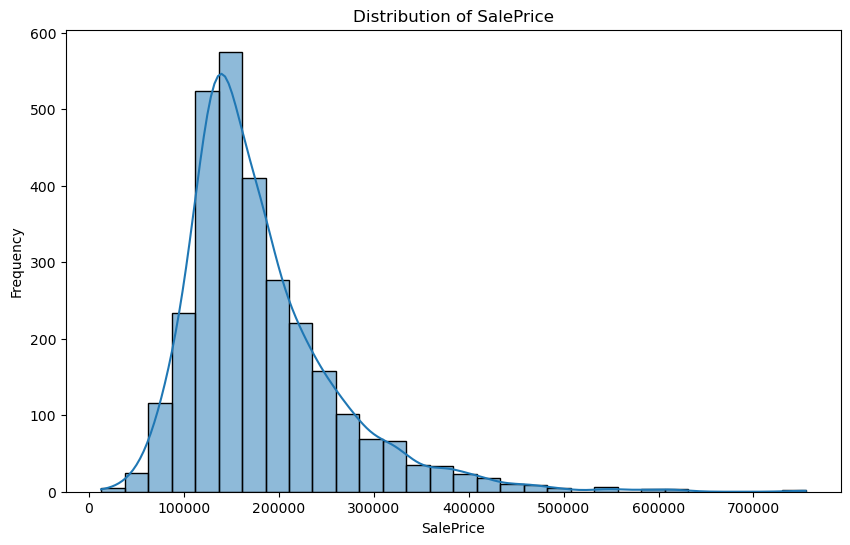

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of SalePrice
plt.figure(figsize=(10, 6))
sns.histplot(ames_data['SalePrice'], kde=True, bins=30)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

#### Comments  
we can see that the histogram is skewed to the right indicating that the housing prices are leaned towards the lower end, with only a few to the higher side

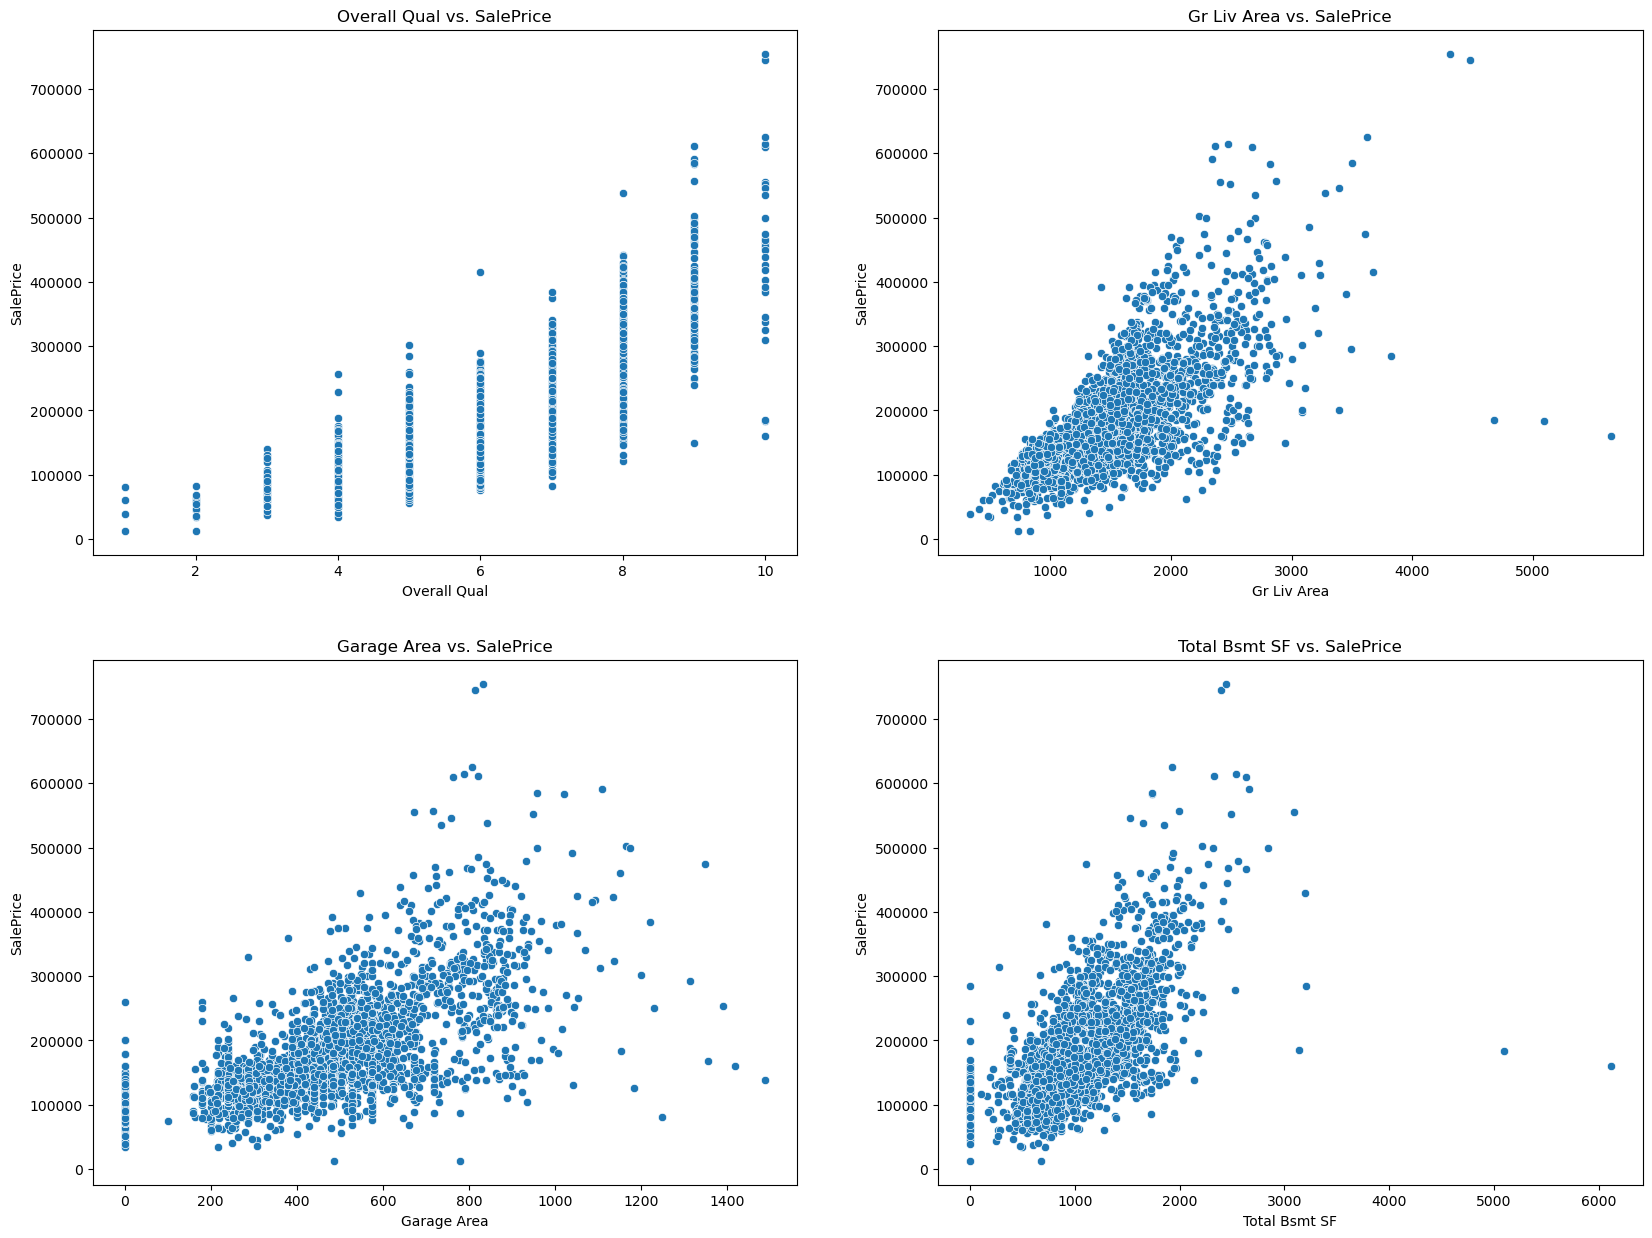

In [16]:
# Scatter plots for some key features vs. SalePrice
key_features = ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF']
plt.figure(figsize=(20, 15))
for i, feature in enumerate(key_features):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(data=ames_data, x=feature, y='SalePrice')
    plt.title(f'{feature} vs. SalePrice')
plt.show()

In [17]:
import numpy as np
# Log transform the target variable
ames_data['Log SalePrice'] = np.log(ames_data['SalePrice'])

# Create new features
ames_data['Total SF'] = ames_data['Gr Liv Area'] + ames_data['Total Bsmt SF']

# Display the first few rows to verify the new features
ames_data[['SalePrice', 'Log SalePrice', 'Gr Liv Area', 'Total Bsmt SF', 'Total SF']].head()


,SalePrice,Log SalePrice,Gr Liv Area,Total Bsmt SF,Total SF
0,215000,12.278393,1656,1080.0,2736.0
1,105000,11.561716,896,882.0,1778.0
2,172000,12.055250,1329,1329.0,2658.0
3,244000,12.404924,2110,2110.0,4220.0
4,189900,12.154253,1629,928.0,2557.0


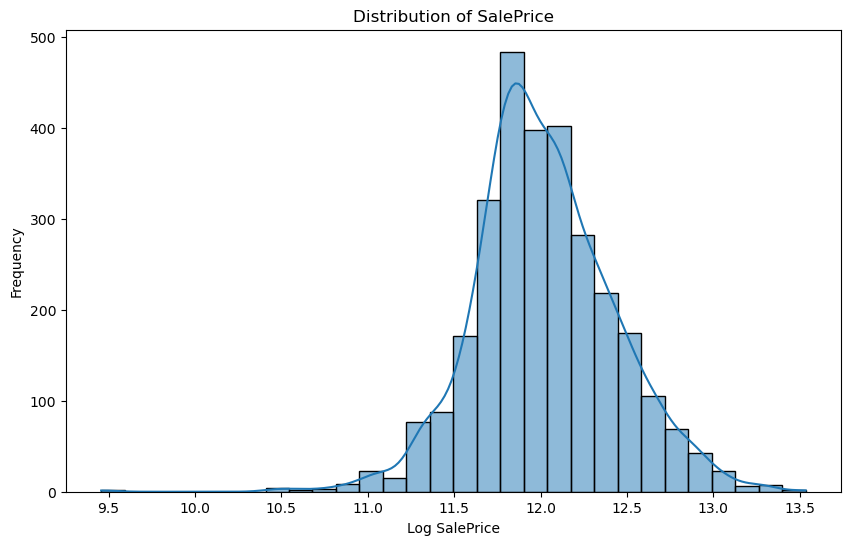

In [18]:
# Plot the distribution of logged SalePrice
plt.figure(figsize=(10, 6))
sns.histplot(ames_data['Log SalePrice'], kde=True, bins=30)
plt.title('Distribution of SalePrice')
plt.xlabel('Log SalePrice')
plt.ylabel('Frequency')
plt.show()

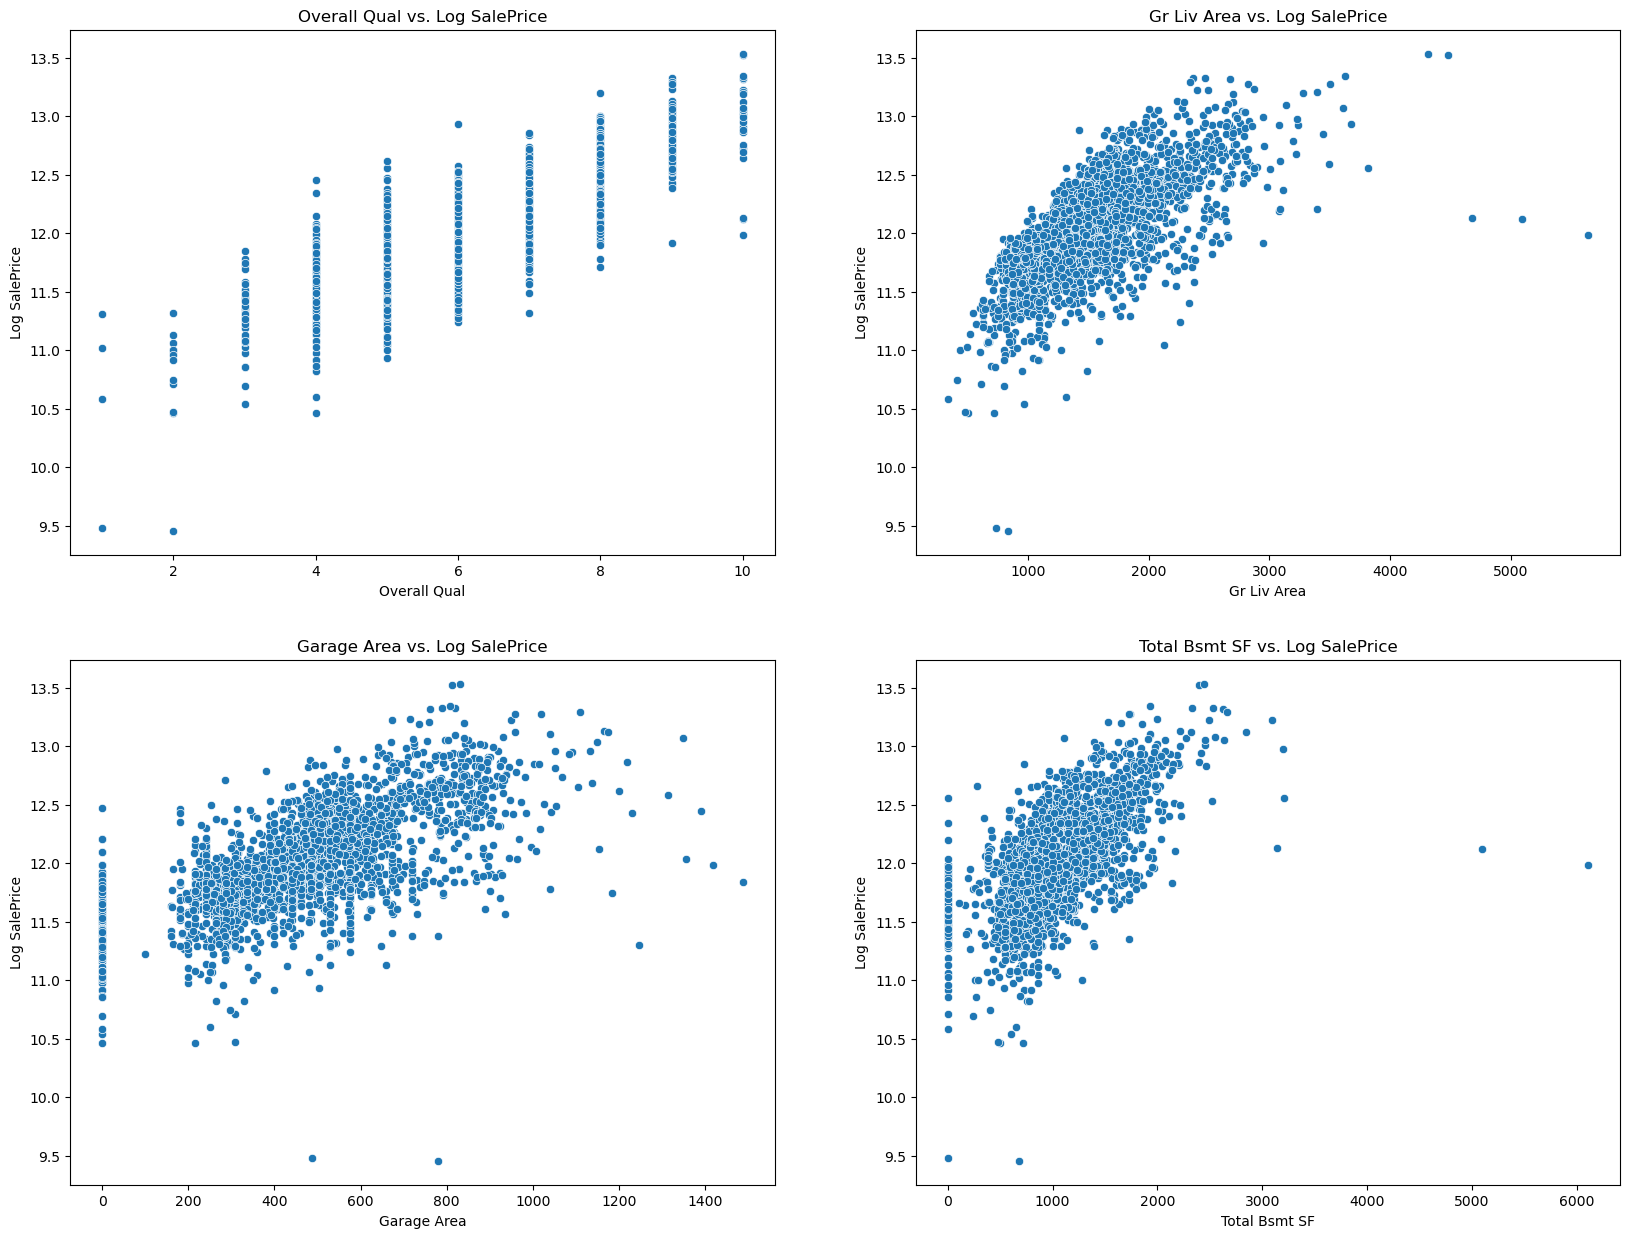

In [19]:
# Scatter plots for some key features vs. SalePrice
key_features = ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF']
plt.figure(figsize=(20, 15))
for i, feature in enumerate(key_features):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(data=ames_data, x=feature, y='Log SalePrice')
    plt.title(f'{feature} vs. Log SalePrice')
plt.show()

#### Simple Linear Regression
Developing a simple linear regression model using Gr Liv Area to predict Log SalePrice.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
# Definig the feature and target variable
X = ames_data[['Gr Liv Area']]
y = ames_data['Log SalePrice']


In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [24]:
# Make predictions
y_pred = model.predict(X_test)

In [25]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(0.08551770002688783, 0.5378209889420327)

### Simple Linear Regression Model Evaluation Results 
***
Mean Squared Error (MSE): 0.0855

R-squared (R²): 0.5378 
***
The simple linear regression model explains about 53.78% of the variance in the log-transformed housing prices based on the Gr Liv Area feature. This is a good start, but we can improve the model by including more features.


### Multiple Linear Regression
Expand the model to include additional features such as Overall Qual, Total SF, Garage Area, and Year Built.

In [26]:
# Define the feature set and target variable
features = ['Gr Liv Area', 'Overall Qual', 'Total SF', 'Garage Area', 'Year Built']
X = ames_data[features]
y = ames_data['Log SalePrice']

In [27]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Training the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [29]:
# Make predictions
y_pred = model.predict(X_test)


In [30]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(0.025507597261943713, 0.8621446078030229)

### Multiple Linear Regression Model Evaluation Results 
***
Mean Squared Error (MSE): 0.0255

R-squared (R²): 0.8621 
***
The multiple linear regression model shows a significant improvement, explaining about 86.21% of the variance in the log-transformed housing prices. This indicates that the model is much better at predicting housing prices when using multiple features.

### Model Validation with Cross-Validation
The next step is to validate our model using cross-validation. Cross-validation helps ensure that our model generalizes well to new, unseen data. We will use k-fold cross-validation, where the data is split into k subsets (folds). The model is trained on k-1 folds and tested on the remaining fold, and this process is repeated k times. The results are then averaged to provide a more reliable measure of model performance.

In [31]:
from sklearn.model_selection import cross_val_score

# Performing 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Displaying the cross-validation results
cv_scores, cv_scores.mean(), cv_scores.std()


(array([0.83157928, 0.85434625, 0.76609171, 0.77373953, 0.84585496]),
 0.8143223448967898,
 0.037059895437628304)

#### Individual R² Scores:
***
Each value in the array represents the R² score for one of the five folds.
These scores indicate how well the model performs on each subset of the data.
***
#### Mean R² Score:
***
The mean R² score of 0.8143 indicates that, on average, the model explains about 81.43% of the variance in the log-transformed housing prices.
This is a good indicator of the model's overall performance.
***
#### Standard Deviation of R² Scores:
***
The standard deviation of 0.0371 shows the variability of the model's performance across different folds.
A lower standard deviation indicates more consistent performance across different subsets of the data. 
***

### Implementing Ridge and Lasso Regression
#### 1. Ridge Regression:
Ridge regression adds a penalty on the size of coefficients to reduce overfitting, especially in the presence of multicollinearity.

#### 2. Lasso Regression:
Lasso regression not only penalizes the size of coefficients but can also shrink some coefficients to zero, effectively performing feature selection.

In [32]:
from sklearn.linear_model import Ridge, Lasso

# Train Ridge regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

In [33]:
# Train Lasso regression model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

ridge_mse, ridge_r2, lasso_mse, lasso_r2

(0.025506850280192842,
 0.8621486448536777,
 0.034508223952963296,
 0.813500868066694)

Ridge Regression: Shows similar performance to our multiple linear regression model, indicating it helps in controlling multicollinearity while maintaining model performance.

Lasso Regression: Has a slightly lower R² value compared to Ridge regression but performs feature selection by potentially setting some coefficients to zero.

#### Based on the R² values:

Ridge Regression (R² = 0.8621) appears to perform slightly better than Lasso (R² = 0.8135).

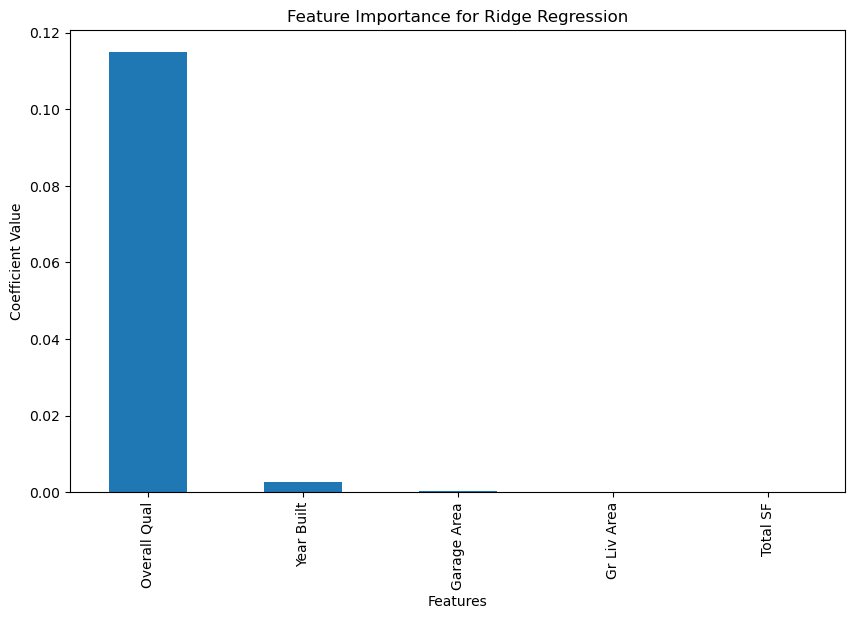

In [34]:
# Feature Importance for my Ridge Regression
ridge_coefficients = pd.Series(ridge_model.coef_, index=features)
ridge_coefficients.sort_values(ascending=False, inplace=True)

ridge_coefficients.plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance for Ridge Regression')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.show()

#### The bar graph displays the coefficients of the features used in the Ridge regression model. Here's what the graph shows:

#### Overall Qual (Overall Quality):

Coefficient Value: Approximately 0.12
Interpretation: This feature has the highest positive impact on predicting the log-transformed sale price. A higher overall quality rating of the house significantly increases the predicted sale price.
#### Year Built:

Coefficient Value: Slightly above 0
Interpretation: The year the house was built has a positive impact on the sale price, but the effect is relatively small compared to overall quality.
#### Garage Area:

Coefficient Value: Very small (close to 0)
Interpretation: The size of the garage area has a minimal positive impact on the sale price in this model.
#### Gr Liv Area (Gross Living Area):

Coefficient Value: Very small (close to 0)
Interpretation: The gross living area, while an important feature, has a minimal impact compared to overall quality when considering the log-transformed sale price in this Ridge regression model.
#### Total SF (Total Square Footage):

Coefficient Value: Very small (close to 0)
Interpretation: The total square footage (sum of gross living area and basement square footage) also has a minimal impact on the predicted sale price in this model.
### Key Insights
Dominant Feature: Overall Qual (Overall Quality) is the most influential feature in predicting the log-transformed sale price. This indicates that the quality of the house's materials and finish plays a crucial role in determining its value.


Minimal Impact Features: Other features like Year Built, Garage Area, Gr Liv Area, and Total SF have a much smaller impact on the predicted sale price in comparison to Overall Qual.

## Conclusions and Recommendations
### Key Findings
#### Overall Quality is Crucial:

The Overall Qual feature is the most significant predictor of housing prices in Ames, Iowa. Houses with higher overall quality ratings tend to have substantially higher sale prices.
#### Year Built and Garage Area:

While Year Built and Garage Area also positively impact sale prices, their influence is much smaller compared to Overall Qual.
#### Living Area and Total Square Footage:

Features like Gr Liv Area (gross living area) and Total SF (total square footage) have minimal impact on the model's predictions when combined with Overall Qual.

## Recommendations
#### Focus on Quality Improvements:

Homeowners: Invest in improving the overall quality of the house, such as better materials and finishes, to significantly increase the home's market value.
Real Estate Agents: Highlight the overall quality aspects of the properties during marketing and selling processes.

#### Newer Constructions:

Builders: Emphasize modern construction techniques and newer buildings to attract higher sale prices, although the impact is not as strong as overall quality.

#### Garage and Living Space:


Homebuyers: While garage area and living space are important, they do not substantially increase the house's value as much as the overall quality. Focus more on the quality of the property rather than just the size.